In [1]:
import numpy as np
import pandas as pd
# 绘图所需的包
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 数据准备
data = pd.read_csv('./data/speed_dating_train.csv')
print(data.shape)

(8277, 195)


In [3]:
# 缺失值考察
def missing(data,threshold):
    percent_missing = data.isnull().sum() / len(data)
    missing = pd.DataFrame({'column_name': data.columns,'percent_missing': percent_missing})
    missing_show = missing.sort_values(by='percent_missing')
    print(missing_show[missing_show['percent_missing']>0].count())
    print('----------------------------------')
    out = missing_show[missing_show['percent_missing']>threshold]
    return out

In [4]:
missing(data,0.7)

column_name        182
percent_missing    182
dtype: int64
----------------------------------


,column_name,percent_missing
shar2_3,shar2_3,0.759816
intel5_3,intel5_3,0.759816
attr5_3,attr5_3,0.759816
amb7_3,amb7_3,0.759816
fun7_3,fun7_3,0.759816
intel7_3,intel7_3,0.759816
sinc7_3,sinc7_3,0.759816
attr7_3,attr7_3,0.759816
sinc5_3,sinc5_3,0.759816
fun5_3,fun5_3,0.759816


In [13]:
# 我们尝试分析X_2表单缺失，是否和匹配存在关系
def null_infomation(data,column):
    data_null = data[[column,'match']].dropna()
    data_shape = data.shape[0]
    data_null_shape = data_null.shape[0]
    print(f'{column}缺失{data_shape-data_null_shape}个值，缺失率为{100*(data_shape-data_null_shape)/data_shape}%')
    dif = 100*(data[data['match']==1].shape[0]/data_shape - data_null[data_null['match']==1].shape[0]/data_null_shape)
    print(f'样本的整体偏差率为{dif}%')
null_infomation(data,'attr7_2')    

attr7_2缺失6316个值，缺失率为76.30784100519512%
样本的整体偏差率为-0.2025112504025428%


In [5]:
# 检查这个观点其实很简单，我们要检查是否存在全部缺失的样本是否可以成功匹配
data_2 = data.loc[:,'satis_2':'amb5_2']
data_2_null = data_2.dropna(how = 'all')
data_2.shape[0]-data_2_null.shape[0]

897

In [6]:
print(data[data_2.isnull().all(axis=1)]['match'].mean())
data[data_2.isnull().all(axis=1)]['match']

0.1426978818283166


11      0
28      0
30      1
42      0
43      0
       ..
8263    1
8266    0
8269    1
8274    0
8275    0
Name: match, Length: 897, dtype: int64

In [7]:
# 笔者一开始怀疑是该名参与者在其他场次填写了信息，从而得到了匹配对象信息，但数据没有统一过来导致的偏差
# 于是我审查了第31个样本（上面的序号30）的所有相亲场次，发现她都没有填写这些表格
data[data.iid==8].loc[:,'satis_2':'amb5_2']

,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,...,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 逐一审查她的匹配对象，当审查到12号男选手时
# 哈哈，相较于刚刚的那位女性，这名男性可能就不是那么受欢迎了，他只得到了两位女士的青睐
data[data.iid==12].loc[:,'round':'attr_o']

,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o
650,10,9,NaN,5,3,3.0,0,-0.14,1,25.0,2.0,35.00,10.00,35.00,10.00,10.00,0.00,0,9.0
1647,10,6,NaN,2,4,4.0,0,-0.18,1,23.0,2.0,20.00,20.00,20.00,20.00,10.00,10.00,0,8.0
2248,10,3,NaN,9,2,2.0,0,0.18,1,24.0,2.0,45.00,5.00,25.00,20.00,0.00,5.00,0,8.0
3695,10,1,NaN,7,9,9.0,1,0.03,0,26.0,6.0,20.00,10.00,20.00,30.00,10.00,10.00,1,10.0
3847,10,8,NaN,4,6,6.0,0,0.37,0,23.0,4.0,10.00,25.00,20.00,25.00,5.00,15.00,1,6.0
5119,10,5,NaN,1,7,7.0,0,0.21,0,22.0,4.0,15.00,15.00,25.00,20.00,15.00,10.00,0,6.0
5457,10,4,NaN,10,5,5.0,0,0.00,1,21.0,2.0,20.00,5.00,25.00,25.00,10.00,15.00,0,8.0
5891,10,10,NaN,6,8,8.0,1,-0.11,1,25.0,2.0,9.09,18.18,27.27,18.18,18.18,9.09,1,8.0
7904,10,2,NaN,8,10,10.0,0,0.65,1,26.0,2.0,15.00,15.00,15.00,40.00,10.00,5.00,0,1.0
8085,10,7,NaN,3,1,1.0,0,0.54,0,21.0,4.0,15.00,20.00,20.00,15.00,15.00,15.00,1,7.0


In [9]:
# 遗憾的是，这名男性也没有填写表格2的信息，算了，就当他们的微信是自己加的好了
# 那这就意味着，不论是否完成后续的调查或者进一步联系，双方在现场就能登记为匹配
# 这个结论十分关键，因为这些特征发生在匹配这一结果之后，这意味删除它们，不会对匹配结果造成影响
data[data.iid==12].loc[:,'satis_2':'amb5_2'].T

,650,1647,2248,3695,3847,5119,5457,5891,7904,8085
satis_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numdat_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attr7_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sinc7_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intel7_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fun7_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amb7_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shar7_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attr1_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 我们现在剩下119个特征，相较于之前的192个降低不少
data_1 = data.loc[:,'iid':'amb3_s']
data_1.shape

(8277, 119)

In [11]:
# 适当调低阈值进一步审查
missing(data_1,0.3)

column_name        106
percent_missing    106
dtype: int64
----------------------------------


,column_name,percent_missing
undergra,undergra,0.414281
attr5_1,attr5_1,0.415247
sinc5_1,sinc5_1,0.415247
intel5_1,intel5_1,0.415247
fun5_1,fun5_1,0.415247
amb5_1,amb5_1,0.415247
income,income,0.489670
attr1_s,attr1_s,0.510934
sinc1_s,sinc1_s,0.510934
intel1_s,intel1_s,0.510934


In [15]:
# 认为多少人可能对自己感兴趣，好敏感的问题，怪不得缺失率高
# 这个偏差还是可观的（按照百分之五做阈值，即0.82%以上）
null_infomation(data_1,'expnum')
# 大学的SAT平均分，用来代表大学水平，缺失可能是较差的大学或者没有大学就读
# 这个偏差同样可观，而且偏差为正，缺失带来竞争劣势
null_infomation(data_1,'mn_sat')
# 本科生学费，影响不可观，删掉
null_infomation(data_1,'tuition')
# 后缀3_s，认为自己的吸引力，影响不可观，删掉
null_infomation(data_1,'amb3_s')
# 进行到一半，问吸引力侧重点，影响不可观，删掉
null_infomation(data_1,'shar1_s')
# 收入，暂时保存
null_infomation(data_1,'income')

expnum缺失6496个值，缺失率为78.48254198381056%
样本的整体偏差率为-1.8213612510181414%
mn_sat缺失5186个值，缺失率为62.65555152833152%
样本的整体偏差率为1.0034706176353243%
tuition缺失4743个值，缺失率为57.30337078651685%
样本的整体偏差率为0.41141272899537507%
amb3_s缺失4325个值，缺失率为52.253231847287665%
样本的整体偏差率为0.07511914142844245%
shar1_s缺失4229个值，缺失率为51.09339132535943%
样本的整体偏差率为0.21453921791945718%
income缺失4053个值，缺失率为48.96701703515767%
样本的整体偏差率为-0.7694858150186168%


In [16]:
# 删掉刚刚初步分析的几个组量，并且删去对明显没有用的、或者有编号的文字特征
data_1.drop(columns = ['tuition','tuition','attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s',
                       'shar1_s','attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s',
                       'position','positin1','field','from'],inplace=True)
data_1.shape

(8277, 103)

In [17]:
# 适当调低阈值再进一步审查，实际上这是最后一次整体审查，之后小于10%的缺失值，将会采取策略填充
missing(data_1,0.1)

column_name        91
percent_missing    91
dtype: int64
----------------------------------


,column_name,percent_missing
shar,shar,0.126737
zipcode,zipcode,0.126978
shar_o,shar_o,0.128549
match_es,match_es,0.139906
amb4_1,amb4_1,0.225806
fun4_1,fun4_1,0.225806
intel4_1,intel4_1,0.225806
attr4_1,attr4_1,0.225806
sinc4_1,sinc4_1,0.225806
shar4_1,shar4_1,0.228464


In [18]:
# 这个偏差还是较小的（按照百分之五做阈值，即0.82%以上，稍稍超过）
null_infomation(data_1,'attr5_1')
# 本科毕业院校，这个缺失率比较本科SAT小一些，但是人家本科SAT分数影响更可观，而且，文本结构编号手段复杂，删掉，大学信息保留一个SAT招生分数够了
null_infomation(data_1,'undergra')
# 后缀4_1，影响不可观，删掉
null_infomation(data_1,'shar4_1')
# 后续的影响都不可观，全部删掉
null_infomation(data_1,'match_es')
null_infomation(data_1,'shar_o')
null_infomation(data_1,'zipcode')
null_infomation(data_1,'shar')

attr5_1缺失3437个值，缺失率为41.52470701945149%
样本的整体偏差率为0.8747979315378546%
undergra缺失3429个值，缺失率为41.42805364262414%
样本的整体偏差率为0.6940980433672195%
shar4_1缺失1891个值，缺失率为22.846441947565545%
样本的整体偏差率为0.47652226136058184%
match_es缺失1158个值，缺失率为13.990576295759332%
样本的整体偏差率为0.5819313273277282%
shar_o缺失1064个值，缺失率为12.854899118037936%
样本的整体偏差率为-0.7927891730128117%
zipcode缺失1051个值，缺失率为12.697837380693487%
样本的整体偏差率为-0.08380426942148911%
shar缺失1049个值，缺失率为12.67367403648665%
样本的整体偏差率为-0.7571704924514977%


In [19]:
data_1.drop(columns = ['undergra','attr5_1','sinc5_1','intel5_1','fun5_1','amb5_1',
                       'shar4_1','sinc4_1','attr4_1','intel4_1','fun4_1','amb4_1',
                       'match_es','shar_o','zipcode','shar'],inplace=True)
data_1.shape

(8277, 87)

空值填充

简单先处理一些量

In [20]:
missing(data_1,0.05)

column_name        75
percent_missing    75
dtype: int64
----------------------------------


,column_name,percent_missing
amb,amb,0.084693
amb_o,amb_o,0.085780
income,income,0.489670
mn_sat,mn_sat,0.626556
expnum,expnum,0.784825


In [21]:
# 对于没有填写期望约会数目的，单独记作一类
# 对于没有SAT分数的，单独记作一类
# 重新考虑了一下，还是去掉收入,反正这个收入也是用邮编估计的
data_1['expnum'].fillna(-1, inplace=True)
data_1['mn_sat'].fillna(-1, inplace=True)
data_1.drop(columns = ['income'],inplace=True)

In [22]:
# 刚刚发现做完上述处理，剩下的缺失就比例很小了，不到百分之一，猜测是否是有些行信息损失严重，这样的话，去掉这些行就好了
# 存在缺失的行一共2159行，看来这样假设不对，不少行都存在缺失
data_1[data_1.isnull().any(axis=1)].shape

(2159, 86)

In [23]:
# 准备对所有数据进行填充，填充主要有用众数、平均数、0等填充手段。我计划主要采用众数填充（这样不会影响按类填充结果）
# 当然，对72个损失中，不适合采用众数填充的，单独处理
missing_out = missing(data_1,0)['column_name']
print(missing_out.index)

column_name        72
percent_missing    72
dtype: int64
----------------------------------
Index(['id', 'pid', 'race', 'race_o', 'reading', 'clubbing', 'dining',
       'hiking', 'art', 'museums', 'tv', 'gaming', 'theater', 'attr1_1',
       'concerts', 'music', 'shopping', 'yoga', 'exercise', 'sinc1_1',
       'intel1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'movies',
       'sports', 'tvsports', 'go_out', 'goal', 'imprelig', 'imprace',
       'field_cd', 'fun1_1', 'amb2_1', 'shar2_1', 'career', 'pf_o_att',
       'pf_o_int', 'pf_o_sin', 'age', 'date', 'pf_o_fun', 'amb1_1', 'exphappy',
       'sinc3_1', 'fun3_1', 'age_o', 'intel3_1', 'attr3_1', 'amb3_1',
       'pf_o_amb', 'shar1_1', 'pf_o_sha', 'career_c', 'int_corr', 'attr',
       'attr_o', 'like', 'like_o', 'sinc', 'sinc_o', 'intel', 'intel_o',
       'prob', 'prob_o', 'fun', 'fun_o', 'met', 'met_o', 'amb', 'amb_o'],
      dtype='object')


In [24]:
# id,pid实际上不是输入特征
data_1.drop(columns = ['iid','pid'],inplace=True)
# 经过审查(随便扫一眼)，应该问题不大，都可以使用众数填充

In [25]:
for columname in data_1.columns:
    data_1[columname].fillna(data_1[columname].mode()[0],inplace=True)

In [26]:
# 填充完毕，缺失审查结束
missing(data_1,0)

column_name        0
percent_missing    0
dtype: int64
----------------------------------


,column_name,percent_missing


特征降维
特征降维一般做两轮，同时兼顾线性和非线性，第一轮做线性，皮尔逊相关系数矩阵，第二轮做机器学习模型贡献度排序

In [27]:
label = data_1['match']
data_input = data_1.drop(columns = ['match'])

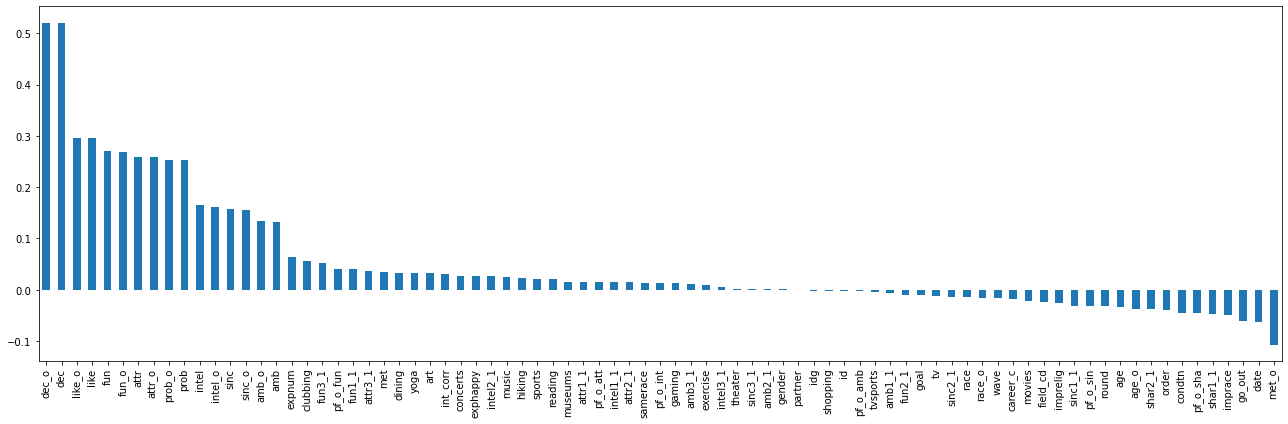

In [28]:
corr = data_1.corr('pearson')
plt.figure(figsize=(18,6))
corr['match'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.tight_layout()

In [29]:
# 误差为0
y_pre = ((data_1['dec']+data_1['dec_o'])/2).values
print((np.floor(y_pre)-label).sum())

0.0


In [30]:
# 好的，本次建模到此结束，现在对测试集合套用刚刚建立的完美模型（哈哈哈）
test_data = pd.read_csv('./data/speed_dating_test.csv')
print(test_data.shape)

(101, 195)


In [31]:
# 得到测试集的标准答案
test_pre = ((test_data['dec']+test_data['dec_o'])/2).values
out = pd.DataFrame(np.floor(test_pre))
# 保存处理结果
writer = pd.ExcelWriter('out.xlsx')
out.to_excel(writer)
writer.save()

EDA
EDA一般在第一轮特征选择后，对排名靠前的几个变量做考虑，虽然说这对整体数据驱动的机器学习框架没有太多作用，但我还是认为EDA加强了分析师对整体数据的掌控感，因而是十分必要的。

<AxesSubplot:ylabel='match'>

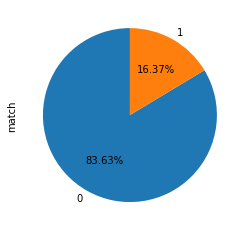

In [32]:
# 做一些简单的EDA工作，首先分析基本匹配成功率，这将作为一个基准，当偏离这个基准时，意味这不同类别的倾向
data_1['match'].value_counts().plot.pie(labeldistance = 1.1,autopct = '%1.2f%%',
                                               shadow = False,startangle = 90,pctdistance = 0.6)

In [33]:
# 首先做的是单因素分析
# 定义一个离散单因素分析的绘图函数
def discrete_plot(data,col_name,label):
    """
    变量为离散型分布
    第1张:按类饼图
    第2张:按类计数(检查是否是由离群特殊值导致分布)
    """
    f,ax = plt.subplots(1,2, figsize=(18,6))
    data[col_name].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=False, cmap='Set3')
    sns.countplot(col_name, hue=label,data=data, ax=ax[1], palette='Set3')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')
    print(data[[col_name,label]].groupby([col_name]).mean().sort_values(by=label))
    print('--------------------------------')
    print(data.groupby([col_name,label])[col_name].count())

         match
like          
0.0   0.000000
9.5   0.000000
9.7   0.000000
3.0   0.010230
2.0   0.013575
1.0   0.018519
4.0   0.023474
5.0   0.056111
6.0   0.126328
7.0   0.190923
7.5   0.200000
6.5   0.263158
8.0   0.330690
4.5   0.333333
9.0   0.363861
8.5   0.444444
10.0  0.445055
5.5   0.500000
--------------------------------
like  match
0.0   0           8
1.0   0         106
      1           2
2.0   0         218
      1           3
3.0   0         387
      1           4
4.0   0         624
      1          15
4.5   0           2
      1           1
5.0   0        1228
      1          73
5.5   0           1
      1           1
6.0   0        1480
      1         214
6.5   0          14
      1           5
7.0   0        1640
      1         387
7.5   0           4
      1           1
8.0   0         844
      1         417
8.5   0           5
      1           4
9.0   0         257
      1         147
9.5   0           2
9.7   0           1
10.0  0         101
      1        

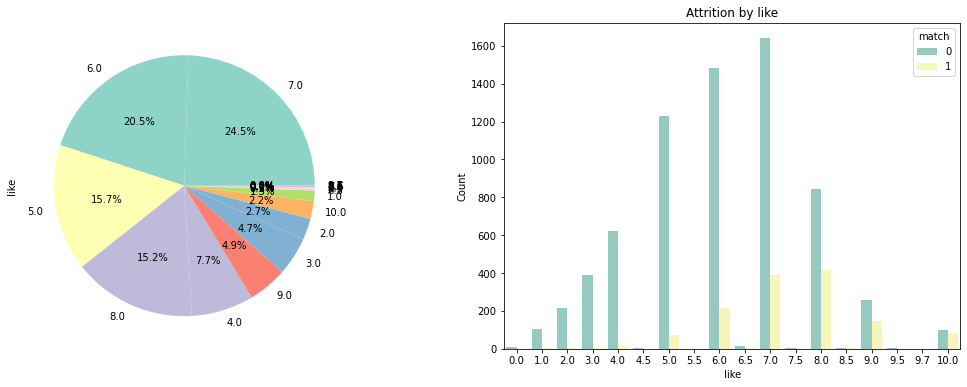

In [34]:
# 正相关特征依次是喜爱程度、幽默、吸引力、智慧、真诚这些更偏向直觉的东西而不是更深层次的背景，这或许就是一见钟情本来的含义
# 而负相关特征的性质都不强，但是反应出的高约会频次、宅等特征呈现劣势还是很有启发性的
# 当然，这里有一些按类编码的要素因为没有做目标编码，特征的相关性呈现会表现的很差，这里可以参考我之前的案例，目标编码的手段有很多，大规模数据直接按频率编码
# 还有一些对运动的喜爱，这些特征在速配相亲中的重要性很低，但生活经验告诉我们共同的体育活动可以增进感情，但这在快速相亲中很难体现
# 最后，随便看看一些EDA结果
discrete_plot(data_1,'like','match')

             match
field_cd          
12.0      0.052632
17.0      0.100000
2.0       0.102439
11.0      0.107527
15.0      0.117647
5.0       0.134118
6.0       0.149533
9.0       0.149593
7.0       0.156118
18.0      0.156863
10.0      0.163099
13.0      0.168331
8.0       0.174119
14.0      0.176000
3.0       0.181686
1.0       0.204856
16.0      0.300000
4.0       0.312057
--------------------------------
field_cd  match
1.0       0         524
          1         135
2.0       0         184
          1          21
3.0       0         563
          1         125
4.0       0          97
          1          44
5.0       0         736
          1         114
6.0       0         273
          1          48
7.0       0         200
          1          37
8.0       0        1570
          1         331
9.0       0         523
          1          92
10.0      0         821
          1         160
11.0      0         415
          1          50
12.0      0          18
          1        

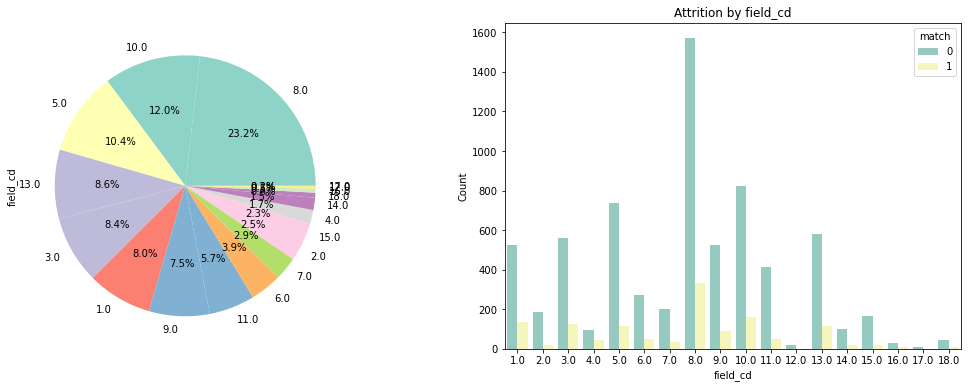

In [35]:
# 其他特征打分估计也是类似结果，我们尝试分析不同专业的人相亲的匹配成功率
# 发现代号4（医学制药和生物技术），代号16（语言类工作），代号1（法律）等专业人员在相亲中占优
# 发现代号12(本科/无业)，代号17（建筑业），代号2（数学），代号11（社会工作）等专业人员在相亲中呈现劣势
# 注意，只有样本足够大的时候，比例才有价值。
# 代号12和代号17的样本数量偏少，可能存在偏差，因此只有对于专业是数学和社会工作的人群，才有把握认为其在相亲中却存劣势
discrete_plot(data,'field_cd','match')

             match
career_c          
12.0      0.000000
13.0      0.075000
17.0      0.100000
10.0      0.127660
8.0       0.128205
9.0       0.143911
5.0       0.152838
2.0       0.153913
6.0       0.158554
11.0      0.159817
4.0       0.163855
15.0      0.168831
7.0       0.177871
16.0      0.186047
1.0       0.199102
3.0       0.206226
14.0      0.300000
--------------------------------
career_c  match
1.0       0         535
          1         133
2.0       0        1935
          1         352
3.0       0         204
          1          53
4.0       0         347
          1          68
5.0       0         194
          1          35
6.0       0         605
          1         114
7.0       0        1761
          1         381
8.0       0          34
          1           5
9.0       0         464
          1          78
10.0      0         328
          1          48
11.0      0         184
          1          35
12.0      0          27
13.0      0          74
          1   

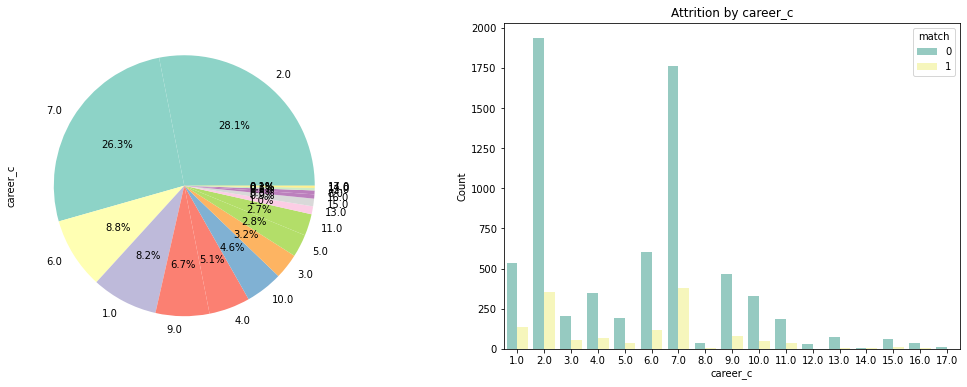

In [36]:
# 专业方面存在的问题，我估计在职业分类方面也能体现
# 职业分类方面，有统计学意义的，只有代号10（无业），代号13（政治）较显著的存在劣势，代号3（心理学家）,代号（法律）存在优势
discrete_plot(data,'career_c','match')

In [37]:
# 定义一个连续单因素分析的绘图函数
def continue_plot(data,col_name,label):
    """
    变量为连续型分布
    第1张:连续分布图
    第2张:箱线图
    """
    f, ax = plt.subplots(1,2, figsize=(18,6))
    sns.distplot(data[data[label] == 1][col_name], ax=ax[0])
    sns.distplot(data[data[label] == 0][col_name], ax=ax[0])
    plt.legend(['1','0'])
    
    sns.boxplot(y=col_name, x=label , data=data, palette='Set2', ax=ax[1])

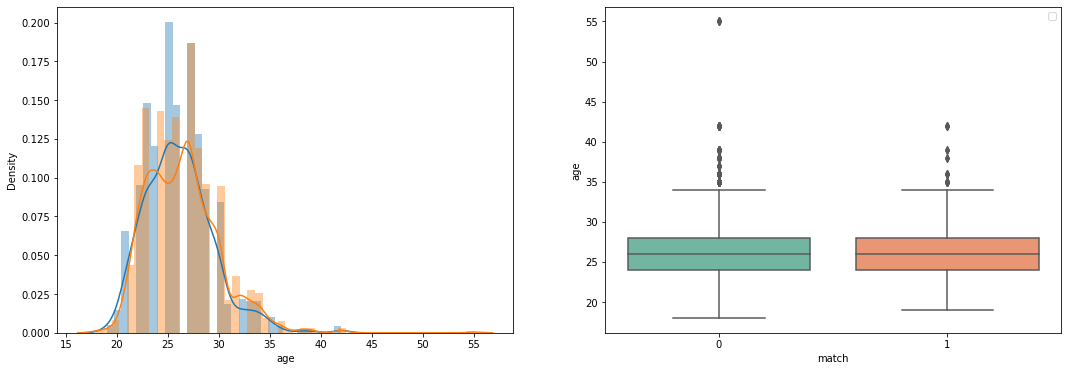

In [38]:
# 似乎并没有看出多少错位，可能因为大家都是和对应年龄相亲，造成了年龄影响不大
continue_plot(data_1,'age','match')

In [39]:
# 加上性别分析一下
def continue_discrete_plot(data, col_con, col_dis, label):
    fig,ax = plt.subplots(figsize = (9,5))
    sns.violinplot(col_dis,col_con,hue=label,data=data,split=True)
    ax.set_title(f'{col_dis} and {col_con} vs {label}') 
    plt.show()

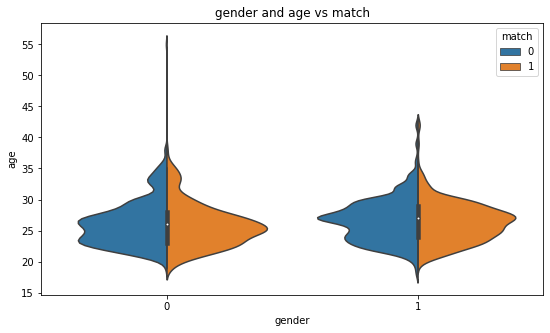

In [40]:
# 正如之前分析的，可能由于相亲过程考虑的年龄匹配，没有出现年龄较低成功率较高的现象
# 但是奇怪的是，女性（0）出现了高龄相亲，男性则没有
# 还有一个比较符合常识的结论，男性的均线比女性大2岁左右
continue_discrete_plot(data_1,'age','gender','match')

总结
我们还是得到了一些基本结论，比方说测试集的标准答案、快速相亲过程中的特征简单重要性、一些专业或者职业类型在相亲中的优劣或者年龄分布。
接下来的过程其实跟我之前做的员工离职分析很类似，重新做些分桶和目标编码的工作，使用SMOTE等方法平衡不平衡数据集后送sklearn中的机器学习模型做特征重要性，再做轮特征选择或者特征构造，之后就是交叉验证调参等等，如果效果不到位，再上神经网络，传统机器学习流程了，最后套一下模型解释方法，对每个样本的相亲战斗力详情都可以可视化了。